In [29]:
# train test split

In [30]:

# 생선 데이터 임포트


# 도미 데이터 로드
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]


# 빙어 데이터 임포트
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight

In [31]:
# 2차원 데이터로 변경
# 이 때 하나의 생선 길이와 무게는 하나의 샘플이 됨
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14

In [32]:
# KN 객체 생성
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [33]:
# train, test split
train_x = fish_data[:35]
test_x = fish_data[35:]
train_y = fish_target[:35]
test_y = fish_target[35:]

In [34]:
kn = kn.fit(train_x, train_y)
kn.score(test_x, test_y)

0.0

In [35]:
# sampling bias
# 훈련데이터에 답이 한 종류만 존재하므로 섞어야 함

In [36]:
import numpy as np
# numpy 변환

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [37]:
print(input_arr)
print(target_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [38]:
# (샘플 수, 특성 수)
print(input_arr.shape)
print(target_arr.shape)

(49, 2)
(49,)


In [39]:
# 인덱스 랜덤하게 섞기
np.random.seed(42)
idx = np.arange(49)
np.random.shuffle(idx)
print(idx)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [40]:
train_x = input_arr[idx[:35]]
train_y = target_arr[idx[:35]]
test_x = input_arr[idx[35:]]
test_y = target_arr[idx[35:]]

In [41]:
print(input_arr[13], train_x[0])

[ 32. 340.] [ 32. 340.]


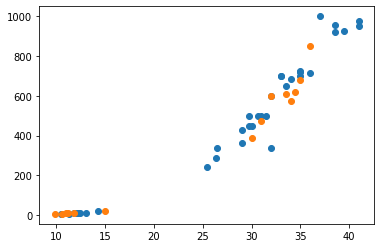

In [43]:
import matplotlib.pyplot as plt
plt.scatter(train_x[:, 0], train_x[:, 1])
plt.scatter(test_x[:, 0], test_x[:, 1])
plt.show()

In [44]:
kn = kn.fit(train_x, train_y)

In [45]:
kn.score(test_x, test_y)

1.0

In [46]:
# predict method는 np배열을 반환
kn.predict(test_x)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [47]:
test_y

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])